In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
nashville = pd.read_csv('data/all_full_marathons.csv')
seattle = pd.read_csv('data/seattle_marathons.csv')
dc = pd.read_csv('data/washington_dc_marathons.csv')
arizona = pd.read_csv('data/arizona_marathons.csv')

In [3]:
nashville.head()

,Unnamed: 0,Overall,Bib,Name,Time,Year,Mar_Type
0,0,1,1,Scott Wietecha,02:25:42,2016,Full
1,1,2,3,Brian Shelton,02:34:43,2016,Full
2,2,3,1047,Christopher Capps,02:38:43,2016,Full
3,3,4,1052,Jason Grimes,02:45:06,2016,Full
4,4,5,1046,David Adams,02:47:28,2016,Full


In [4]:
nashville = nashville.drop(columns = 'Unnamed: 0')
nashville = nashville.drop(columns = 'Mar_Type')
nashville.head()

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:25:42,2016
1,2,3,Brian Shelton,02:34:43,2016
2,3,1047,Christopher Capps,02:38:43,2016
3,4,1052,Jason Grimes,02:45:06,2016
4,5,1046,David Adams,02:47:28,2016


In [5]:
seattle.head()

,Overall,Bib,Name,Time,Year
0,1,2,Samuel Golitom Hadgu,02:26:01,2016
1,2,1015,Jeff Stein,02:31:05,2016
2,3,1046,Andrew Ivanov,02:32:49,2016
3,4,1030,Steve Vesbach,02:42:38,2016
4,5,1158,Alexander Rockhill,02:42:48,2016


In [6]:
dc.head()

,Overall,Bib,Name,Time,Year
0,1,6067,Alfredo Arevalo Reyes,02:30:04,2016
1,2,2,Steve Chu,02:34:09,2016
2,3,1151,Dirian Bonilla,02:37:25,2016
3,4,1154,Raul Lopez,02:42:14,2016
4,5,1059,Travis Hawkins,02:43:23,2016


In [7]:
arizona.head()

,Overall,Bib,Name,Time,Year
0,1,57037,Gerald Blanchard,00:35:50,2016
1,1,51409,Corey Petersen,02:27:18,2016
2,2,52042,Johnny Camacho,00:54:28,2016
3,3,56074,Dan Iwanaga,00:52:34,2016
4,4,8,Tommy Rivers Puzey,02:25:22,2016


In [8]:
nashville['Location'] = 'Nashville'
dc['Location'] = 'DC'
seattle['Location'] = 'Seattle'
arizona['Location'] = 'Arizona'

In [9]:
all_marathons = pd.concat([nashville, seattle, arizona, dc])

In [10]:
all_marathons.shape

(44507, 6)

In [11]:
all_marathons.head()

,Overall,Bib,Name,Time,Year,Location
0,1,1,Scott Wietecha,02:25:42,2016,Nashville
1,2,3,Brian Shelton,02:34:43,2016,Nashville
2,3,1047,Christopher Capps,02:38:43,2016,Nashville
3,4,1052,Jason Grimes,02:45:06,2016,Nashville
4,5,1046,David Adams,02:47:28,2016,Nashville


In [12]:
all_marathons.tail()

,Overall,Bib,Name,Time,Year,Location
10620,99999,32021,Katherine Orsino,00:00:00,2019,DC
10621,99999,31558,Michael Kohler,00:00:00,2019,DC
10622,99999,32072,Melissa Houston,00:00:00,2019,DC
10623,99999,31349,Karl Kniffin,00:00:00,2019,DC
10624,99999,32156,Preston Griffin,00:00:00,2019,DC


In [13]:
all_marathons.Location = all_marathons.Location.astype('category')

In [14]:
all_marathons = all_marathons.reset_index(drop =  True)

In [15]:
all_marathons.head()

,Overall,Bib,Name,Time,Year,Location
0,1,1,Scott Wietecha,02:25:42,2016,Nashville
1,2,3,Brian Shelton,02:34:43,2016,Nashville
2,3,1047,Christopher Capps,02:38:43,2016,Nashville
3,4,1052,Jason Grimes,02:45:06,2016,Nashville
4,5,1046,David Adams,02:47:28,2016,Nashville


In [16]:
all_marathons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44507 entries, 0 to 44506
Data columns (total 6 columns):
Overall     44507 non-null int64
Bib         44507 non-null int64
Name        44507 non-null object
Time        44507 non-null object
Year        44507 non-null int64
Location    44507 non-null category
dtypes: category(1), int64(3), object(2)
memory usage: 1.7+ MB


In [17]:
all_marathons = all_marathons[all_marathons.Time != '00:00:00']

In [18]:
all_marathons.shape

(34896, 6)

In [19]:
all_marathons['DateTime'] = pd.to_datetime(all_marathons.Time)

In [20]:
all_marathons.head()

,Overall,Bib,Name,Time,Year,Location,DateTime
0,1,1,Scott Wietecha,02:25:42,2016,Nashville,2019-09-28 02:25:42
1,2,3,Brian Shelton,02:34:43,2016,Nashville,2019-09-28 02:34:43
2,3,1047,Christopher Capps,02:38:43,2016,Nashville,2019-09-28 02:38:43
3,4,1052,Jason Grimes,02:45:06,2016,Nashville,2019-09-28 02:45:06
4,5,1046,David Adams,02:47:28,2016,Nashville,2019-09-28 02:47:28


In [21]:
all_marathons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34896 entries, 0 to 43767
Data columns (total 7 columns):
Overall     34896 non-null int64
Bib         34896 non-null int64
Name        34896 non-null object
Time        34896 non-null object
Year        34896 non-null int64
Location    34896 non-null category
DateTime    34896 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(3), object(2)
memory usage: 1.9+ MB


In [22]:
all_marathons["Total_Sec"] = pd.to_timedelta(all_marathons.Time).dt.total_seconds()

In [23]:
all_marathons.head()

,Overall,Bib,Name,Time,Year,Location,DateTime,Total_Sec
0,1,1,Scott Wietecha,02:25:42,2016,Nashville,2019-09-28 02:25:42,8742.0
1,2,3,Brian Shelton,02:34:43,2016,Nashville,2019-09-28 02:34:43,9283.0
2,3,1047,Christopher Capps,02:38:43,2016,Nashville,2019-09-28 02:38:43,9523.0
3,4,1052,Jason Grimes,02:45:06,2016,Nashville,2019-09-28 02:45:06,9906.0
4,5,1046,David Adams,02:47:28,2016,Nashville,2019-09-28 02:47:28,10048.0


In [24]:
all_marathons.to_csv('data/marathons_with_time_as_seconds.csv')

**There are 3600 seconds per hour**

In [25]:
all_marathons[all_marathons.Year == 2019].Total_Sec.mean()

16547.59973599296

In [26]:
all_marathons.Total_Sec = all_marathons.Total_Sec.astype(int)

In [27]:
all_marathons.head()

,Overall,Bib,Name,Time,Year,Location,DateTime,Total_Sec
0,1,1,Scott Wietecha,02:25:42,2016,Nashville,2019-09-28 02:25:42,8742
1,2,3,Brian Shelton,02:34:43,2016,Nashville,2019-09-28 02:34:43,9283
2,3,1047,Christopher Capps,02:38:43,2016,Nashville,2019-09-28 02:38:43,9523
3,4,1052,Jason Grimes,02:45:06,2016,Nashville,2019-09-28 02:45:06,9906
4,5,1046,David Adams,02:47:28,2016,Nashville,2019-09-28 02:47:28,10048


In [28]:
avg_2016 = (all_marathons[all_marathons.Year == 2016].Total_Sec.mean() / 3600)
avg_2017 = (all_marathons[all_marathons.Year == 2017].Total_Sec.mean() / 3600)
avg_2018 = (all_marathons[all_marathons.Year == 2018].Total_Sec.mean() / 3600)
avg_2019 = (all_marathons[all_marathons.Year == 2019].Total_Sec.mean() / 3600)

In [29]:
year = [2016, 2017, 2018, 2019]
averages = [avg_2016, avg_2017, avg_2018, avg_2019]

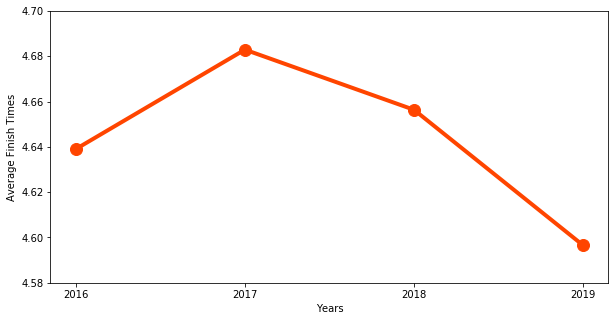

In [30]:
fig = plt.figure(figsize=(10,5))
plt.plot(year, averages, color = 'orangered', linewidth=4, marker='o', markersize=12, fillstyle = 'full')
plt.xlabel('Years')
plt.xticks(year)
plt.ylabel('Average Finish Times')
plt.ylim(4.58, 4.7)
plt.show()

In [31]:
elite_runners = all_marathons[all_marathons.Total_Sec <= 9000]

In [32]:
elite_runners = elite_runners.reset_index(drop = True)

In [33]:
elite_runners.tail()

,Overall,Bib,Name,Time,Year,Location,DateTime,Total_Sec
31,1,1,Tyler Andrews,02:20:45,2018,DC,2019-09-28 02:20:45,8445
32,2,2,Yezid Alexander Orjuela Soche,02:25:42,2018,DC,2019-09-28 02:25:42,8742
33,1882,22652,Firas Shoorbajee,02:04:00,2018,DC,2019-09-28 02:04:00,7440
34,1,71,Tyler Andrews,02:24:13,2019,DC,2019-09-28 02:24:13,8653
35,2,30013,Aaron Kremer,02:29:34,2019,DC,2019-09-28 02:29:34,8974


In [34]:
elite_runners.shape

(36, 8)

In [35]:
all_marathons.Location.value_counts()

Nashville    9705
DC           8647
Seattle      8509
Arizona      8035
Name: Location, dtype: int64

In [36]:
elite_runners = elite_runners[elite_runners.Overall <= 500]
elite_runners = elite_runners.reset_index(drop = True)

In [37]:
elite_runners

,Overall,Bib,Name,Time,Year,Location,DateTime,Total_Sec
0,1,1,Scott Wietecha,02:25:42,2016,Nashville,2019-09-28 02:25:42,8742
1,1,1,Scott Wietecha,02:28:16,2018,Nashville,2019-09-28 02:28:16,8896
2,2,3,Garang Madut,02:29:52,2018,Nashville,2019-09-28 02:29:52,8992
3,1,30001,Travis Peruski,01:37:54,2019,Nashville,2019-09-28 01:37:54,5874
4,1,2,Samuel Golitom Hadgu,02:26:01,2016,Seattle,2019-09-28 02:26:01,8761
5,1,57037,Gerald Blanchard,00:35:50,2016,Arizona,2019-09-28 00:35:50,2150
6,1,51409,Corey Petersen,02:27:18,2016,Arizona,2019-09-28 02:27:18,8838
7,2,52042,Johnny Camacho,00:54:28,2016,Arizona,2019-09-28 00:54:28,3268
8,3,56074,Dan Iwanaga,00:52:34,2016,Arizona,2019-09-28 00:52:34,3154
9,4,8,Tommy Rivers Puzey,02:25:22,2016,Arizona,2019-09-28 02:25:22,8722


In [38]:
elite_runners = elite_runners.drop([3, 5, 7, 8])

In [39]:
elite_runners = elite_runners.reset_index(drop = True)
elite_runners

,Overall,Bib,Name,Time,Year,Location,DateTime,Total_Sec
0,1,1,Scott Wietecha,02:25:42,2016,Nashville,2019-09-28 02:25:42,8742
1,1,1,Scott Wietecha,02:28:16,2018,Nashville,2019-09-28 02:28:16,8896
2,2,3,Garang Madut,02:29:52,2018,Nashville,2019-09-28 02:29:52,8992
3,1,2,Samuel Golitom Hadgu,02:26:01,2016,Seattle,2019-09-28 02:26:01,8761
4,1,51409,Corey Petersen,02:27:18,2016,Arizona,2019-09-28 02:27:18,8838
5,4,8,Tommy Rivers Puzey,02:25:22,2016,Arizona,2019-09-28 02:25:22,8722
6,5,1,Roosevelt Cook,02:27:45,2016,Arizona,2019-09-28 02:27:45,8865
7,1,1,Thomas Puzey,02:19:57,2017,Arizona,2019-09-28 02:19:57,8397
8,2,5,Roosevelt Cook,02:23:47,2017,Arizona,2019-09-28 02:23:47,8627
9,3,2,Naamn Weldeyohans,02:24:11,2017,Arizona,2019-09-28 02:24:11,8651


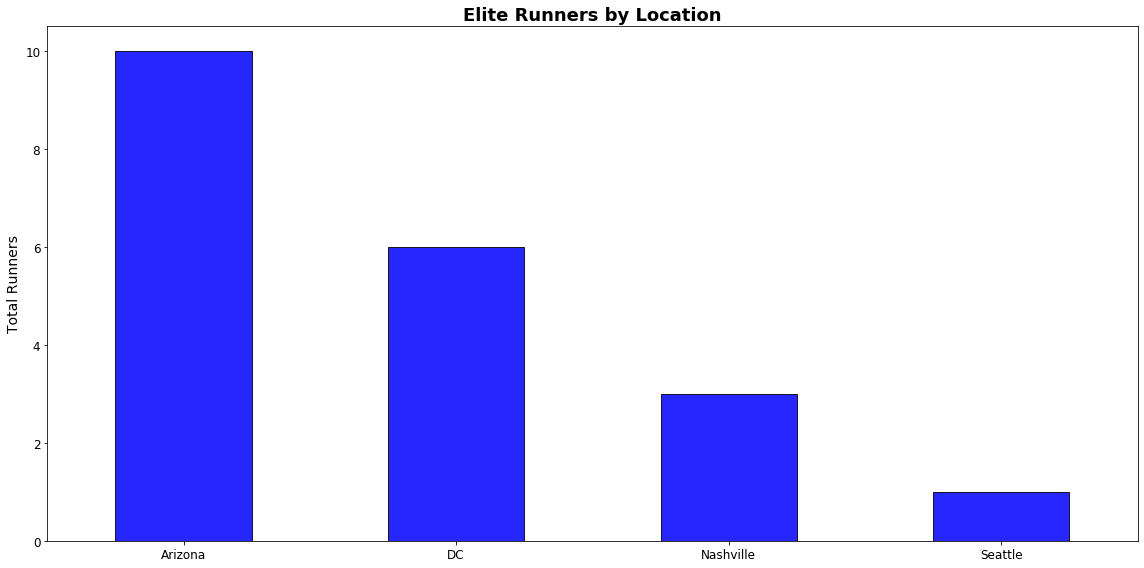

In [40]:
fig = plt.figure(figsize=(16,8))
elite_runners.Location.value_counts().plot(kind = 'bar', color = 'blue', ec = 'black', alpha = .85)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
# plt.grid(axis='y', alpha=0.2)
plt.ylabel('Total Runners', fontsize = 14)
plt.title('Elite Runners by Location', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.savefig('data/elite_runners.png')
plt.show()

In [41]:
seattle = all_marathons[all_marathons.Location == 'Seattle']
arizona = all_marathons[all_marathons.Location == 'Arizona']
nashville = all_marathons[all_marathons.Location == 'Nashville']
dc = all_marathons[all_marathons.Location == 'DC']

In [42]:
seattle_avgs_2016 = (seattle[seattle.Year == 2016].Total_Sec.mean() / 3600)
seattle_avgs_2017 = (seattle[seattle.Year == 2017].Total_Sec.mean() / 3600)
seattle_avgs_2018 = (seattle[seattle.Year == 2018].Total_Sec.mean() / 3600)
seattle_avgs_2019 = (seattle[seattle.Year == 2019].Total_Sec.mean() / 3600)
seattle_avg = [seattle_avgs_2016, seattle_avgs_2017, seattle_avgs_2018, seattle_avgs_2019]
arizona_avgs_2016 = (arizona[arizona.Year == 2016].Total_Sec.mean() / 3600)
arizona_avgs_2017 = (arizona[arizona.Year == 2017].Total_Sec.mean() / 3600)
arizona_avgs_2018 = (arizona[arizona.Year == 2018].Total_Sec.mean() / 3600)
arizona_avgs_2019 = (arizona[arizona.Year == 2019].Total_Sec.mean() / 3600)
arizona_avg = [arizona_avgs_2016, arizona_avgs_2017, arizona_avgs_2018, arizona_avgs_2019]
dc_avgs_2016 = (dc[dc.Year == 2016].Total_Sec.mean() / 3600)
dc_avgs_2017 = (dc[dc.Year == 2017].Total_Sec.mean() / 3600)
dc_avgs_2018 = (dc[dc.Year == 2018].Total_Sec.mean() / 3600)
dc_avgs_2019 = (dc[dc.Year == 2019].Total_Sec.mean() / 3600)
dc_avg = [dc_avgs_2016, dc_avgs_2017, dc_avgs_2018, dc_avgs_2019]
nashville_avgs_2016 = (nashville[nashville.Year == 2016].Total_Sec.mean() / 3600)
nashville_avgs_2017 = (nashville[nashville.Year == 2017].Total_Sec.mean() / 3600)
nashville_avgs_2018 = (nashville[nashville.Year == 2018].Total_Sec.mean() / 3600)
nashville_avgs_2019 = (nashville[nashville.Year == 2019].Total_Sec.mean() / 3600)
nashville_avg = [nashville_avgs_2016, nashville_avgs_2017, nashville_avgs_2018, nashville_avgs_2019]

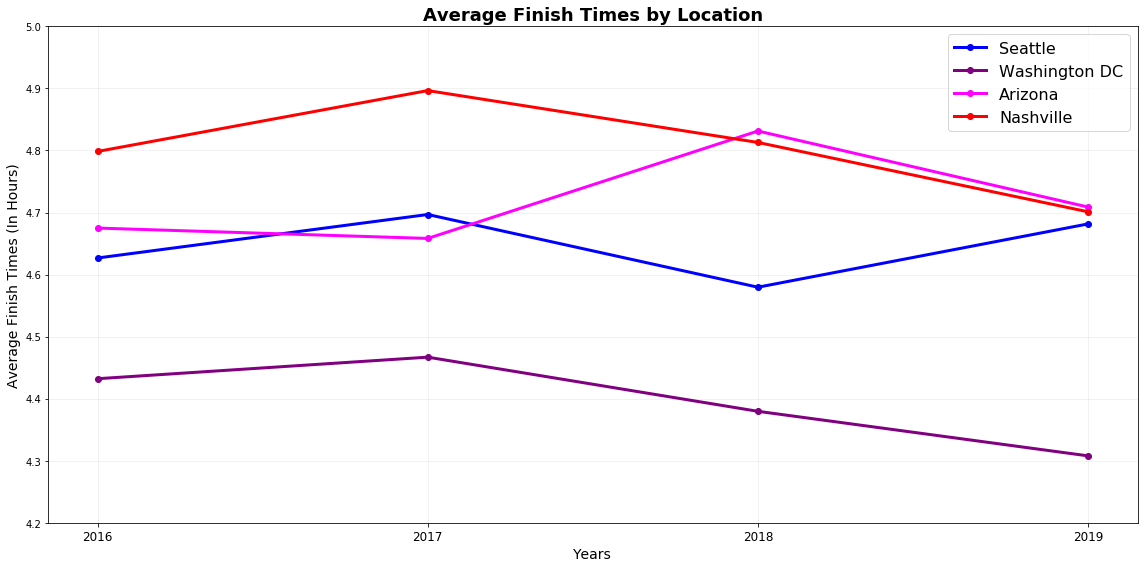

In [43]:
fig = plt.figure(figsize=(16,8))
plt.plot(year, seattle_avg, color = 'blue', linewidth=3, marker='o', markersize=6, label = 'Seattle')
plt.plot(year, dc_avg, color = 'purple', linewidth=3, marker='o', markersize=6, label = 'Washington DC')
plt.plot(year, arizona_avg, color = 'magenta', linewidth=3, marker='o', markersize=6, label = 'Arizona')
plt.plot(year, nashville_avg, color = 'red', linewidth=3, marker='o', markersize=6, label = 'Nashville');
plt.title('Average Finish Times by Location', fontsize = 18, fontweight = 'bold')
plt.xlabel('Years', fontsize = 14)
plt.xticks(year, fontsize = 12)
plt.ylabel('Average Finish Times (In Hours)', fontsize = 14)
plt.ylim(4.2, 5)
plt.grid(alpha = .2)
plt.legend(fontsize = 16)
plt.tight_layout()
plt.savefig('data/average_times_loc.png')
plt.show()

In [44]:
arizona_avg

[4.6750035265904915, 4.658286446523054, 4.831402830245247, 4.708831515564644]

In [45]:
seattle_avg

[4.626779309233063, 4.696848795617133, 4.579680323674278, 4.681675919994305]

In [46]:
nashville_avg

[4.798470729796283, 4.896558766859345, 4.812997943363392, 4.701212208504801]

In [47]:
dc_avg

[4.432224625333158, 4.466941956207021, 4.379673098483508, 4.307880232924142]

In [48]:
arizona['Hours'] = all_marathons.Total_Sec / 3600
seattle['Hours'] = all_marathons.Total_Sec / 3600
dc['Hours'] = all_marathons.Total_Sec / 3600
nashville['Hours'] = all_marathons.Total_Sec / 3600
seattle.head()

C:\Users\1saml\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\1saml\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\1saml\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Overall,Bib,Name,Time,Year,Location,DateTime,Total_Sec,Hours
12419,1,2,Samuel Golitom Hadgu,02:26:01,2016,Seattle,2019-09-28 02:26:01,8761,2.433611
12420,2,1015,Jeff Stein,02:31:05,2016,Seattle,2019-09-28 02:31:05,9065,2.518056
12421,3,1046,Andrew Ivanov,02:32:49,2016,Seattle,2019-09-28 02:32:49,9169,2.546944
12422,4,1030,Steve Vesbach,02:42:38,2016,Seattle,2019-09-28 02:42:38,9758,2.710556
12423,5,1158,Alexander Rockhill,02:42:48,2016,Seattle,2019-09-28 02:42:48,9768,2.713333


In [49]:
all_marathons['Hours'] = all_marathons.Total_Sec / 3600
all_marathons.head()

,Overall,Bib,Name,Time,Year,Location,DateTime,Total_Sec,Hours
0,1,1,Scott Wietecha,02:25:42,2016,Nashville,2019-09-28 02:25:42,8742,2.428333
1,2,3,Brian Shelton,02:34:43,2016,Nashville,2019-09-28 02:34:43,9283,2.578611
2,3,1047,Christopher Capps,02:38:43,2016,Nashville,2019-09-28 02:38:43,9523,2.645278
3,4,1052,Jason Grimes,02:45:06,2016,Nashville,2019-09-28 02:45:06,9906,2.751667
4,5,1046,David Adams,02:47:28,2016,Nashville,2019-09-28 02:47:28,10048,2.791111


In [50]:
nashville = nashville.drop(columns = 'DateTime')
seattle = seattle.drop(columns = 'DateTime')
dc = dc.drop(columns = 'DateTime')
arizona = arizona.drop(columns = 'DateTime')

In [51]:
all_marathons = all_marathons.drop(columns = 'DateTime')
all_marathons.tail()

,Overall,Bib,Name,Time,Year,Location,Total_Sec,Hours
43763,1760,31557,Sara Kenigsberg,05:50:29,2019,DC,21029,5.841389
43764,1761,32714,Francesca Gibson,05:50:29,2019,DC,21029,5.841389
43765,1762,30909,Sajan Moktan,05:51:42,2019,DC,21102,5.861667
43766,1763,30461,Jonathan Cho,05:52:27,2019,DC,21147,5.874167
43767,1764,32437,Chinna Mulaparti,05:54:11,2019,DC,21251,5.903056


In [52]:
arizona.Hours.mean()

4.712354490769565

In [53]:
dc.Hours.mean()

4.405260751962785

In [54]:
nashville.Hours.mean()

4.807558703989919

In [55]:
seattle.Hours.mean()

4.64744368707643

In [56]:
all_marathons = all_marathons[all_marathons.Hours >= 2]

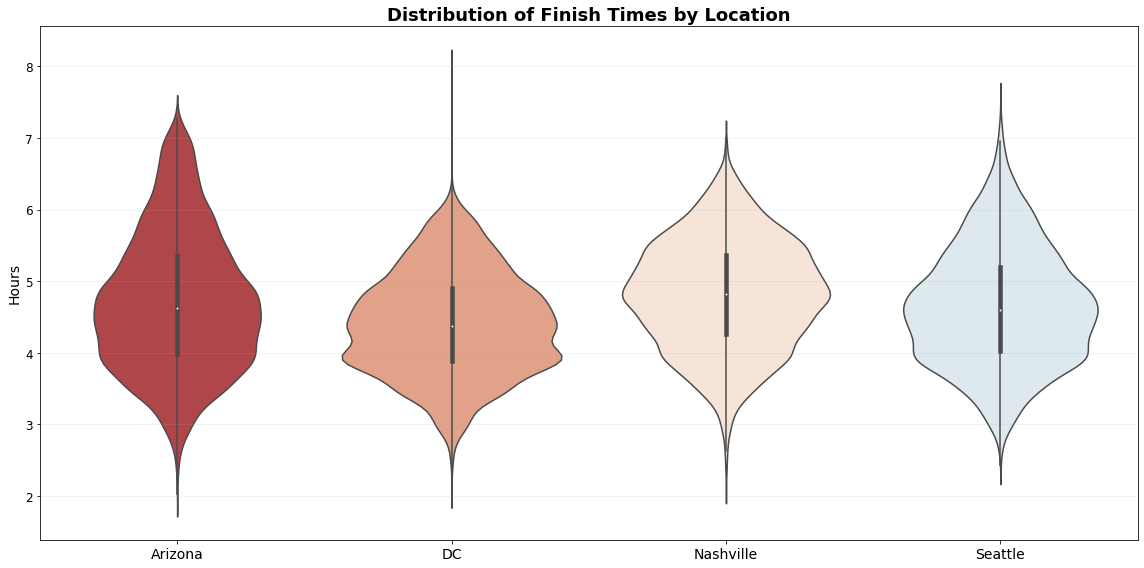

In [57]:
fig = plt.figure(figsize=(16,8))
current_palette = sns.color_palette("RdBu")
sns.set_palette(current_palette)
sns.violinplot(x="Location", y="Hours", data=all_marathons)
plt.title('Distribution of Finish Times by Location', fontsize = 18, fontweight = 'bold')
plt.xlabel('',fontsize = 14)
plt.xticks(fontsize=14)
plt.ylabel('Hours', fontsize = 14)
plt.yticks(fontsize=12)
plt.grid(axis ='y', alpha = .2)
plt.tight_layout()
plt.savefig('data/seaborn_location_violin.png')
plt.show()
# ax = sns.stripplot(x="Location", y="Hours", data=all_marathons, jitter=True)

In [58]:
multiple_marathoners = all_marathons[all_marathons.Name.duplicated()]

In [59]:
multiple_marathoners.shape

(5677, 8)

In [60]:
multiple_marathoners.Hours.mean()

4.5846426124909625

In [61]:
mult_2016 = (multiple_marathoners[multiple_marathoners.Year == 2016].Total_Sec.mean() / 3600)
mult_2017 = (multiple_marathoners[multiple_marathoners.Year == 2017].Total_Sec.mean() / 3600)
mult_2018 = (multiple_marathoners[multiple_marathoners.Year == 2018].Total_Sec.mean() / 3600)
mult_2019 = (multiple_marathoners[multiple_marathoners.Year == 2019].Total_Sec.mean() / 3600)

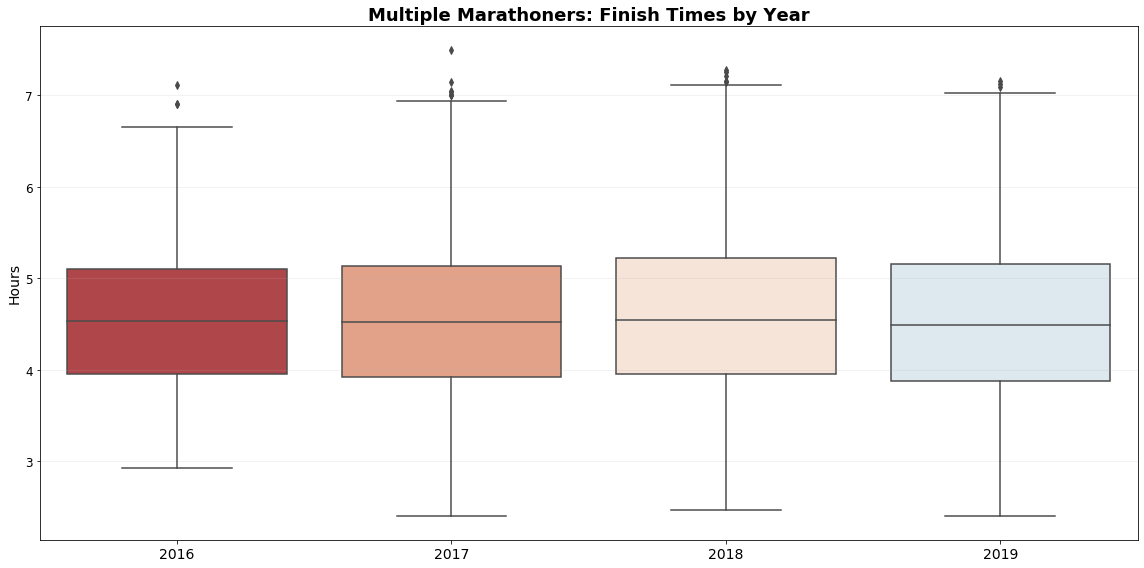

In [62]:
fig = plt.figure(figsize=(16,8))
current_palette = sns.color_palette("RdBu")
sns.set_palette(current_palette)
sns.boxplot(x="Year", y="Hours", data=multiple_marathoners)
plt.title('Multiple Marathoners: Finish Times by Year', fontsize = 18, fontweight = 'bold')
plt.xlabel('',fontsize = 14)
plt.xticks(fontsize=14)
plt.ylabel('Hours', fontsize = 14)
plt.yticks(fontsize=12)
plt.grid(axis ='y', alpha = .2)
plt.tight_layout()
#plt.savefig('data/seaborn_location_violin.png')
plt.show()

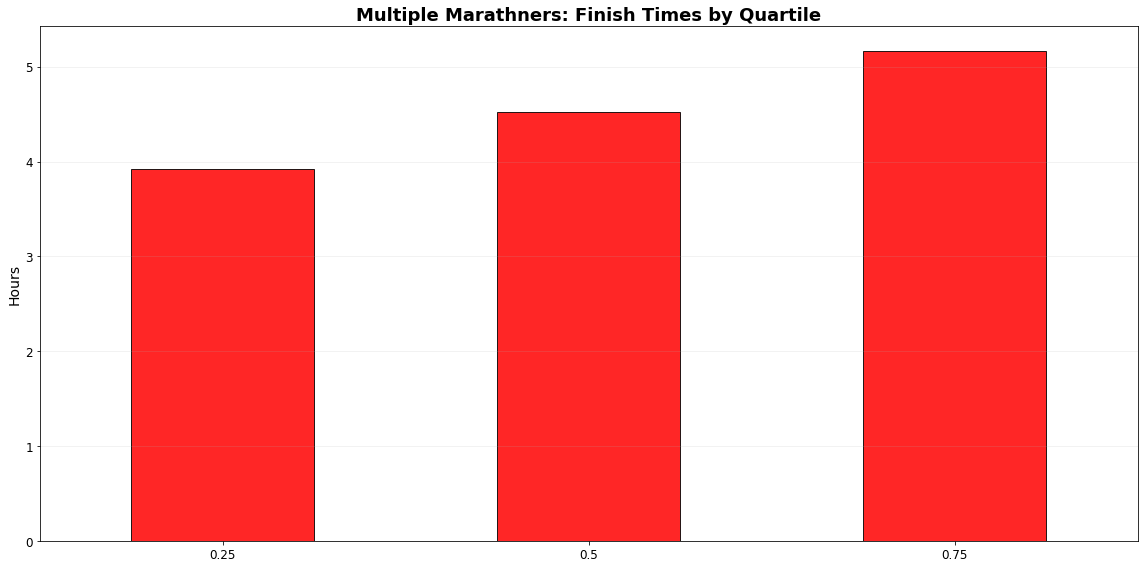

In [63]:
fig = plt.figure(figsize=(16,8))
multiple_marathoners.Hours.quantile([.25, .50, .75]).plot(kind = 'bar', color = 'red', ec = 'black', alpha = .85)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
plt.grid(axis='y', alpha=0.2)
plt.ylabel('Hours', fontsize = 14)
plt.title('Multiple Marathners: Finish Times by Quartile', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.savefig('data/multiple_marathoners_quartile.png')
plt.show()

In [64]:
multiple_marathoners.Hours.quantile([.25, .5, .75])

0.25    3.919167
0.50    4.518333
0.75    5.166667
Name: Hours, dtype: float64